In [3]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [4]:
# load the dataset
data=pd.read_csv("customer_support_tickets.csv")

DATASET OVERVIEW :

In [5]:
# display the first few rows of the dataset
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [6]:
# display last few rows of the dataset
data.tail()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0
8468,8469,Steven Davis MD,lori20@example.net,53,Other,Philips Hue Lights,2020-06-01,Billing inquiry,Hardware issue,There seems to be a hardware problem with my {...,Open,NaN,High,Phone,NaN,NaN,NaN


DATASET DIMENSIONS AND SIZE :

In [7]:
# display the total number of rows in the dataset
len(data)

8469

In [8]:
# display the shape of the dataset i.e. total no. of rows and columns
data.shape

(8469, 17)

COLUMNS OVERVIEW :

In [9]:
# display the names of all columns in the dataset
data.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [10]:
#print columns type wise
category  = data.select_dtypes(['object']).columns
integer  = data.select_dtypes(['int64']).columns
float = data.select_dtypes(['float']).columns
print(category)
print(integer)
print(float)


Index(['Customer Name', 'Customer Email', 'Customer Gender',
       'Product Purchased', 'Date of Purchase', 'Ticket Type',
       'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution',
       'Ticket Priority', 'Ticket Channel', 'First Response Time',
       'Time to Resolution'],
      dtype='object')
Index(['Ticket ID', 'Customer Age'], dtype='object')
Index(['Customer Satisfaction Rating'], dtype='object')


In [11]:
# Convert a column to datetime
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'], format='%Y-%m-%d')
data['First Response Time'] = pd.to_datetime(data['First Response Time'], format='%Y-%m-%d %H:%M:%S')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], format='%Y-%m-%d %H:%M:%S')

data.dtypes

Ticket ID                                int64
Customer Name                           object
Customer Email                          object
Customer Age                             int64
Customer Gender                         object
Product Purchased                       object
Date of Purchase                datetime64[ns]
Ticket Type                             object
Ticket Subject                          object
Ticket Description                      object
Ticket Status                           object
Resolution                              object
Ticket Priority                         object
Ticket Channel                          object
First Response Time             datetime64[ns]
Time to Resolution              datetime64[ns]
Customer Satisfaction Rating           float64
dtype: object

STATISTICAL SUMMARY,DATASET STRUCTURE AND METADATA

In [12]:
#display all the basic numerical terms for all numerical columns
data.describe()

,Ticket ID,Customer Age,Date of Purchase,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,8469.000000,8469.000000,8469,5650,2769,2769.000000
mean,4235.000000,44.026804,2020-12-30 01:35:13.071201024,2023-06-01 11:26:47.270265600,2023-06-01 11:17:21.509931520,2.991333
min,1.000000,18.000000,2020-01-01 00:00:00,2023-05-31 21:55:39,2023-05-31 21:53:30,1.000000
25%,2118.000000,31.000000,2020-07-02 00:00:00,2023-06-01 05:24:28.750000128,2023-06-01 05:34:43,2.000000
50%,4235.000000,44.000000,2020-12-31 00:00:00,2023-06-01 11:26:25,2023-06-01 11:17:48,3.000000
75%,6352.000000,57.000000,2021-07-01 00:00:00,2023-06-01 17:37:06.249999872,2023-06-01 17:07:32,4.000000
max,8469.000000,70.000000,2021-12-30 00:00:00,2023-06-02 00:54:21,2023-06-02 00:55:33,5.000000
std,2444.934048,15.296112,NaN,NaN,NaN,1.407016


In [13]:
#display all columns name with total no. of non-null values and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     8469 non-null   int64         
 1   Customer Name                 8469 non-null   object        
 2   Customer Email                8469 non-null   object        
 3   Customer Age                  8469 non-null   int64         
 4   Customer Gender               8469 non-null   object        
 5   Product Purchased             8469 non-null   object        
 6   Date of Purchase              8469 non-null   datetime64[ns]
 7   Ticket Type                   8469 non-null   object        
 8   Ticket Subject                8469 non-null   object        
 9   Ticket Description            8469 non-null   object        
 10  Ticket Status                 8469 non-null   object        
 11  Resolution                    

*DATA* CLEANING :

In [14]:
#Checking duplicate line
duplicate = data.duplicated().any()
duplicate

False

In [15]:
#display FALSE for all NOT NULL values and TRUE for all NULL values in the given dataset
data.isnull()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True
8465,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True
8466,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
#display if the column has any null value or not
data.isnull().any()

Ticket ID                       False
Customer Name                   False
Customer Email                  False
Customer Age                    False
Customer Gender                 False
Product Purchased               False
Date of Purchase                False
Ticket Type                     False
Ticket Subject                  False
Ticket Description              False
Ticket Status                   False
Resolution                       True
Ticket Priority                 False
Ticket Channel                  False
First Response Time              True
Time to Resolution               True
Customer Satisfaction Rating     True
dtype: bool

In [17]:
#display total no. of null values for each column
data.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

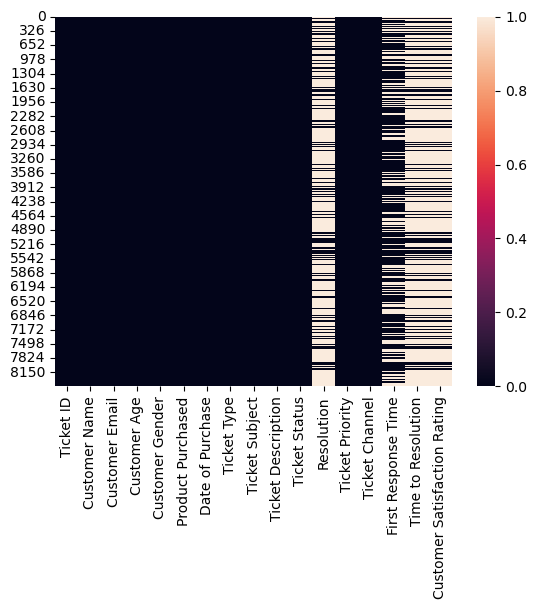

In [18]:
#display null values for each column in the heatmap form
sns.heatmap(data.isnull())
plt.show()

UNIVARIATE ANALYSIS :

Ticket Subject
Refund request              576
Software bug                574
Product compatibility       567
Delivery problem            561
Hardware issue              547
Battery life                542
Network problem             539
Installation support        530
Product setup               529
Payment issue               526
Product recommendation      517
Account access              509
Peripheral compatibility    496
Data loss                   491
Cancellation request        487
Display issue               478
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\859707815.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=ticket_counts.index,x=ticket_counts,palette='viridis')


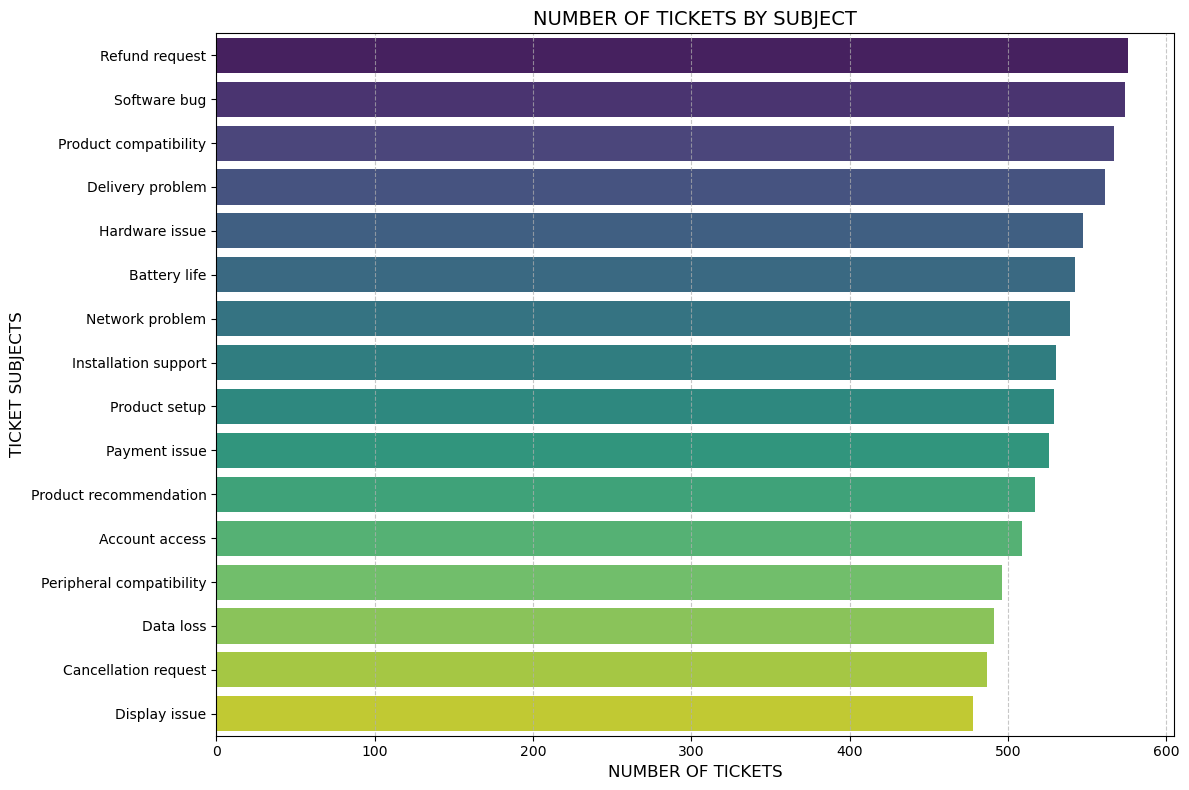

In [19]:
#count and plot ticket subject distribution
ticket_counts=data['Ticket Subject'].value_counts()
print(ticket_counts)
ticket_counts_sorted = ticket_counts.sort_values(ascending=True)
plt.figure(figsize=(12,8))
sns.barplot(y=ticket_counts.index,x=ticket_counts,palette='viridis')
plt.xlabel('NUMBER OF TICKETS',fontsize=12)
plt.ylabel('TICKET SUBJECTS',fontsize=12)
plt.title('NUMBER OF TICKETS BY SUBJECT',fontsize=14)
plt.grid(axis='x',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()




Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1641297086.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=ticket_type.index,x=ticket_type, palette='viridis')


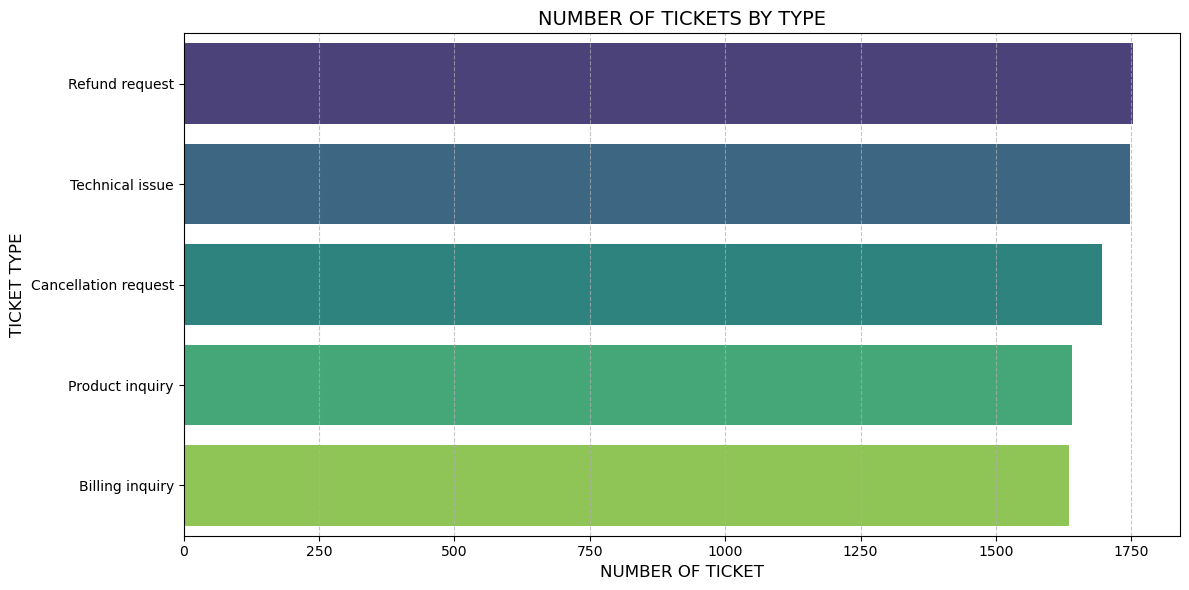

In [20]:
# count and plot ticket type distribution
ticket_type=data['Ticket Type'].value_counts()
print(ticket_type)
plt.figure(figsize=(12,6))
sns.barplot(y=ticket_type.index,x=ticket_type, palette='viridis')
plt.xlabel('NUMBER OF TICKET',fontsize=12)
plt.ylabel('TICKET TYPE',fontsize=12)
plt.title('NUMBER OF TICKETS BY TYPE',fontsize=14)
plt.grid(axis='x',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

Ticket Status Distribution: Ticket Status
Pending Customer Response    2881
Open                         2819
Closed                       2769
Name: count, dtype: int64


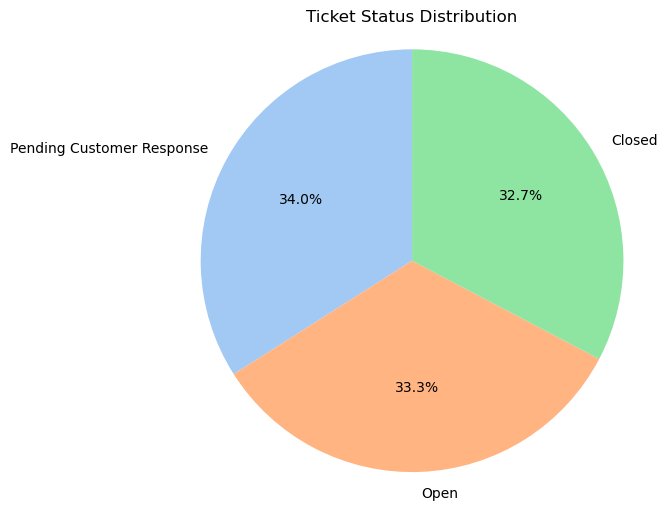

In [21]:
#count and plot ticket status distribution
ticket_status=data['Ticket Status'].value_counts()
print("Ticket Status Distribution:",ticket_status)
plt.figure(figsize=(6,6))
plt.pie(ticket_status,labels=ticket_status.index, autopct='%1.1f%%',colors=sns.color_palette('pastel'), startangle=90)
plt.title('Ticket Status Distribution')
plt.axis('equal')
plt.show()

Customer Gender Distribution: Customer Gender
Male      2896
Female    2887
Other     2686
Name: count, dtype: int64


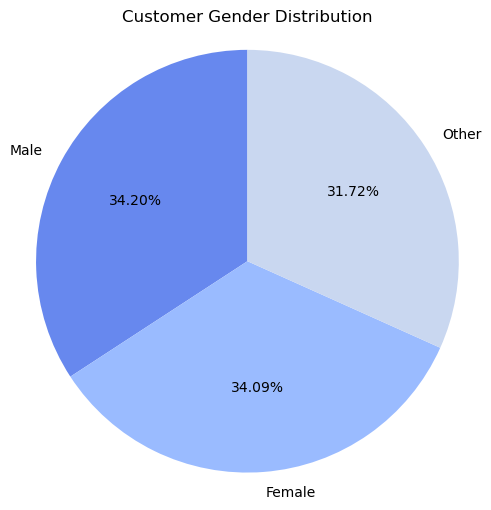

In [22]:
#count and plot Customer Gender Distribution
customer_gender = data['Customer Gender'].value_counts()
print("Customer Gender Distribution:",customer_gender)
plt.figure(figsize=(6, 6))
plt.pie(customer_gender,labels=customer_gender.index, autopct='%1.2f%%',colors=sns.color_palette('coolwarm'), startangle=90)
plt.title('Customer Gender Distribution')
plt.axis('equal')
plt.show()

Ticket Channel Distribution: Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\149476194.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=ticket_channel.index, x=ticket_channel, palette='rocket')


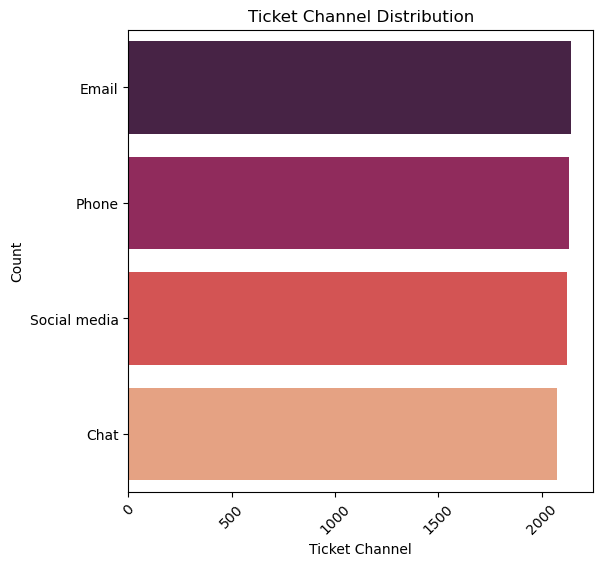

In [23]:
#count and plot Ticket Channel Distribution
plt.figure(figsize=(6, 6))
ticket_channel = data['Ticket Channel'].value_counts()
print("Ticket Channel Distribution:",ticket_channel)
sns.barplot(y=ticket_channel.index, x=ticket_channel, palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

top 10 product purchased:


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\3863850647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_purchased.index,x=product_purchased, palette='magma')


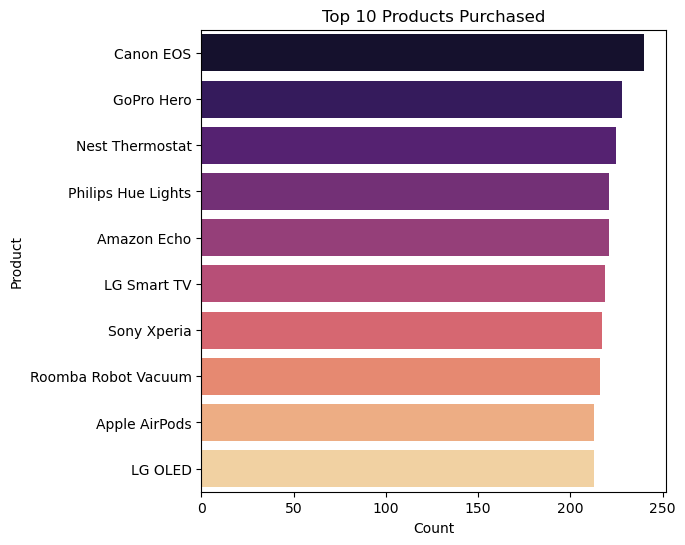

In [24]:
#count and plot Product Purchased Distribution
plt.figure(figsize=(6,6))
product_purchased = data['Product Purchased'].value_counts().head(10)
print("top 10 product purchased:")
sns.barplot(y=product_purchased.index,x=product_purchased, palette='magma')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

ticket priority distribution: Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64


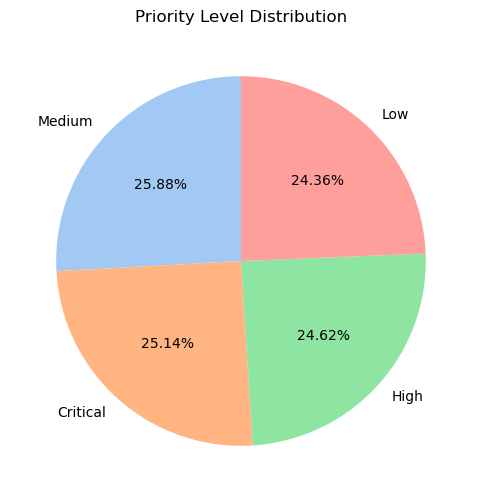

In [25]:
# Count and plot ticket priorities distribution
ticket_priority = data['Ticket Priority'].value_counts()
print("ticket priority distribution:",ticket_priority)
plt.figure(figsize=(8, 6))
plt.pie(ticket_priority,labels=ticket_priority.index, autopct='%1.2f%%',colors=sns.color_palette('pastel'), startangle=90)
plt.title('Priority Level Distribution')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\2024734367.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tickets_by_age_group = data.groupby('Age Group').size()
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\2024734367.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tickets_by_age_group.index,y=tickets_by_age_group, palette='muted')


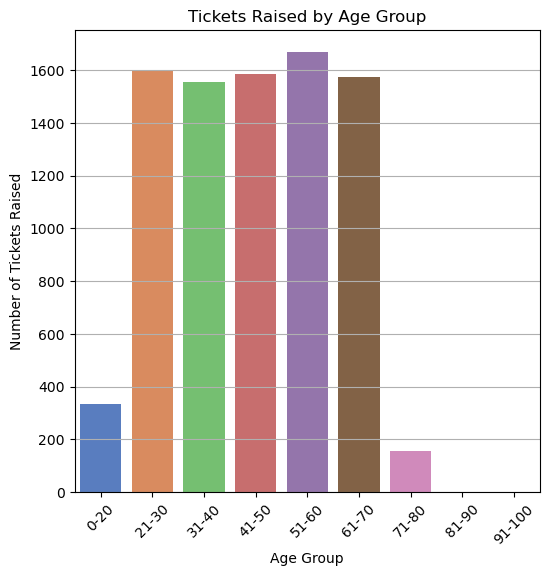

In [26]:
# Define age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70','71-80', '81-90', '91-100']
# Categorize customers into age groups
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins,labels=labels, right=False)
# Calculate number of tickets raised by each age group
tickets_by_age_group = data.groupby('Age Group').size()
# Plot
plt.figure(figsize=(6, 6))
sns.barplot(x=tickets_by_age_group.index,y=tickets_by_age_group, palette='muted')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



customer satisfaction rating: Customer Satisfaction Rating
3.0    580
1.0    553
2.0    549
5.0    544
4.0    543
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\3996496677.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_satisfaction_rating.index,y=customer_satisfaction_rating, palette='magma')


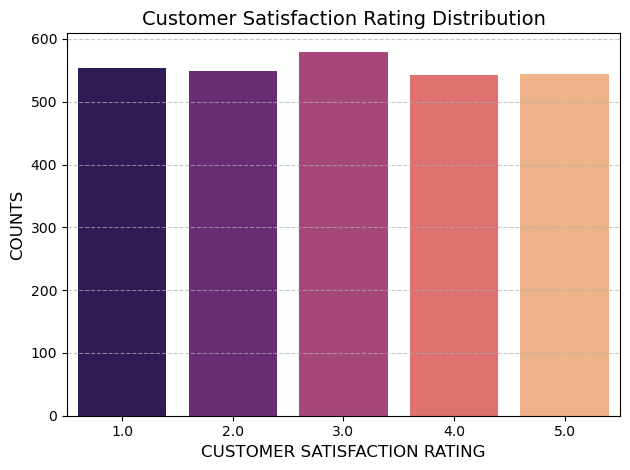

In [27]:
#count and plot customer satisfaction rating
customer_satisfaction_rating=data['Customer Satisfaction Rating'].value_counts()
print("customer satisfaction rating:",customer_satisfaction_rating)
sns.barplot(x=customer_satisfaction_rating.index,y=customer_satisfaction_rating, palette='magma')
plt.title('Customer Satisfaction Rating Distribution',fontsize=14)
plt.xlabel('CUSTOMER SATISFACTION RATING',fontsize=12)
plt.ylabel('COUNTS',fontsize=12)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()


BIVARIATE ANALYSIS :

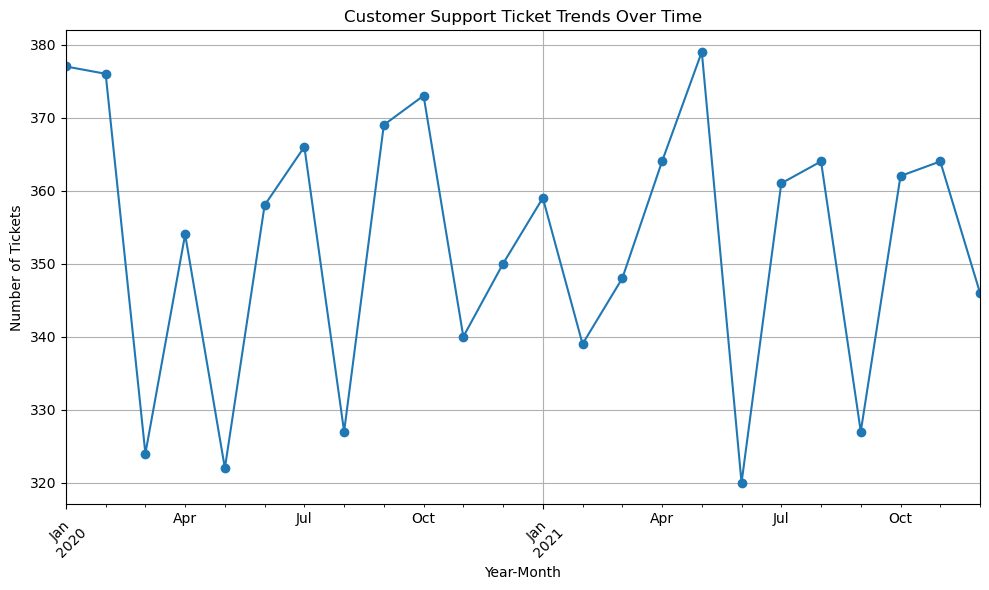

In [28]:
# Plotting ticket trends over time
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['YearMonth'] = data['Date of Purchase'].dt.to_period('M')
ticket_trends = data.groupby('YearMonth').size()
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


  Customer Gender  Customer Satisfaction Rating
0          Female                      2.971545
1            Male                      3.028384
2           Other                      2.974684


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\1693328234.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted',order=['Male', 'Female', 'Other'])


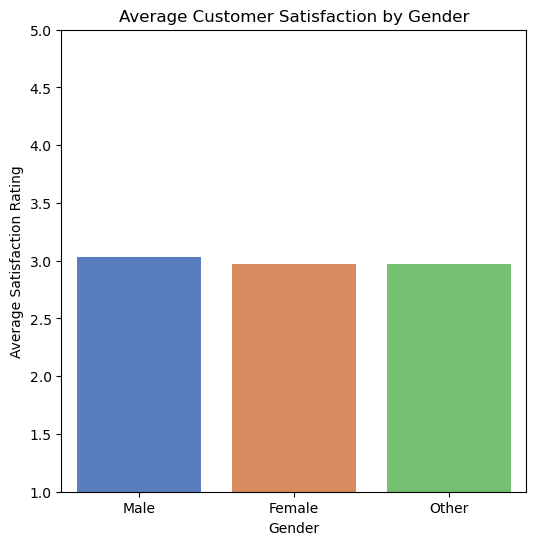

In [29]:
#Average Customer Satisfaction by Gender (Bar Plot)
average_satisfaction = data.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()
print(average_satisfaction)
plt.figure(figsize=(6, 6))
sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted',order=['Male', 'Female', 'Other'])
plt.title('Average Customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(1, 5) # Adjust y-axis limit if needed
plt.show()

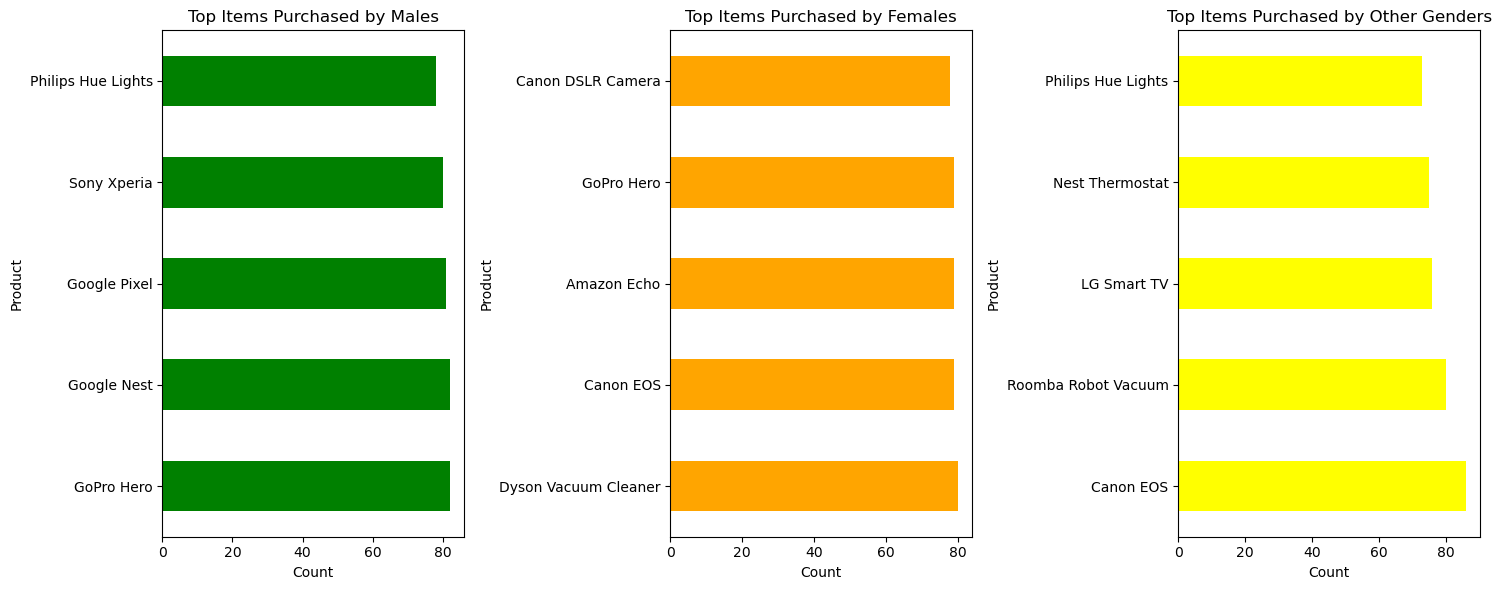

In [30]:
# Top Items Purchased by Gender (Horizontal Bar Chart)
plt.figure(figsize=(15, 6))
# Top Items Purchased by Males
plt.subplot(1, 3, 1)
top_items_male = data[data['Customer Gender'] =='Male']['Product Purchased'].value_counts().head(5)
top_items_male.plot(kind='barh', color='green')
plt.title('Top Items Purchased by Males')
plt.xlabel('Count')
plt.ylabel('Product')
# Top Items Purchased by Females
plt.subplot(1, 3, 2)
top_items_female = data[data['Customer Gender'] =='Female']['Product Purchased'].value_counts().head(5)
top_items_female.plot(kind='barh', color='orange')
plt.title('Top Items Purchased by Females')
plt.xlabel('Count')
plt.ylabel('Product')
# Top Items Purchased by Other Gender
plt.subplot(1, 3, 3)
top_items_other = data[data['Customer Gender'] =='Other']['Product Purchased'].value_counts().head(5)
top_items_other.plot(kind='barh', color='yellow')
plt.title('Top Items Purchased by Other Genders')
plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


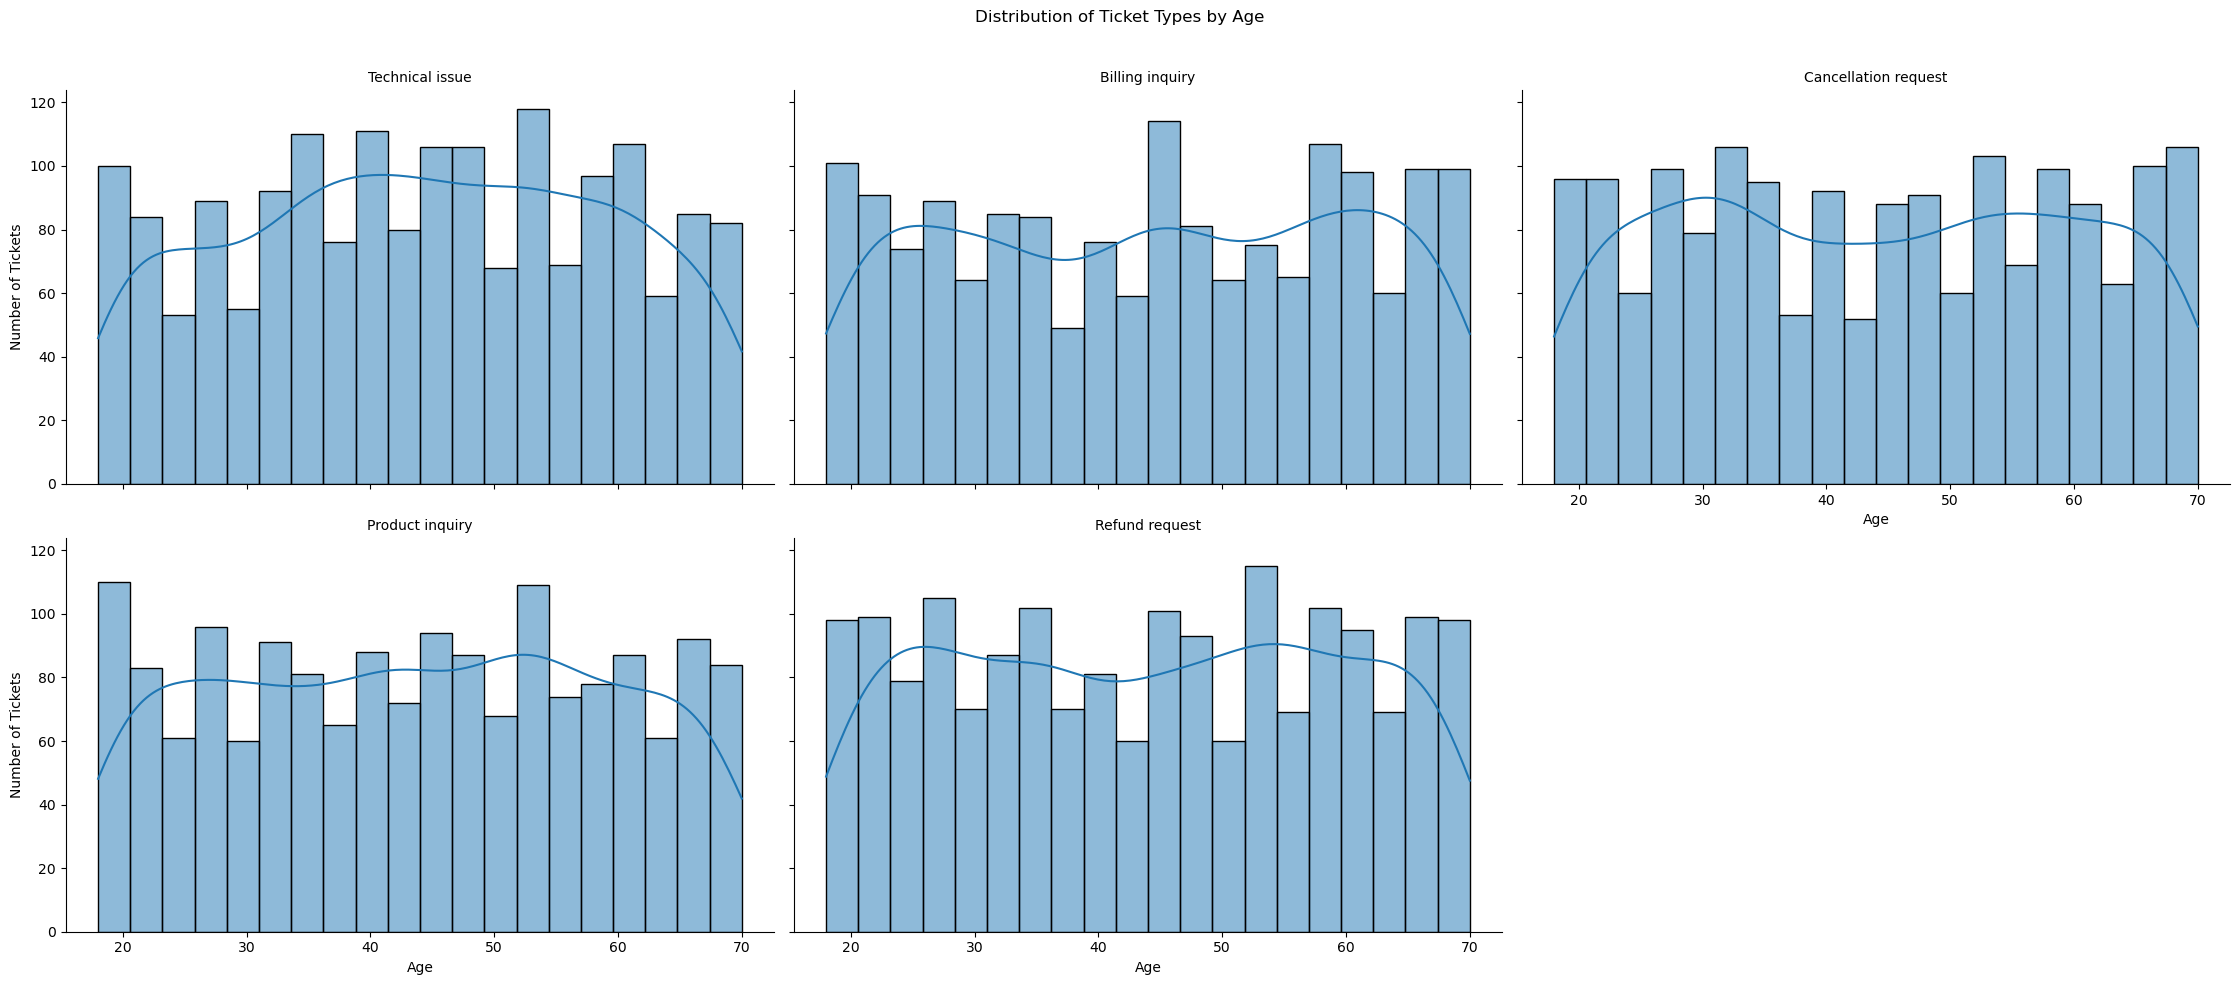

In [31]:
# Replace inf values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Create a facet grid for each ticket type
g = sns.FacetGrid(data, col='Ticket Type', col_wrap=3,height=5, aspect=1.5)
g.map(sns.histplot, 'Customer Age', bins=20, kde=True)
# Set titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('Age', 'Number of Tickets')
# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')
# Show plot
plt.show()


In [32]:
#Creating New Column Resolution Time
data['Resolution Time'] = data['Time to Resolution'] - data['First Response Time']
data['Resolution Time'] = data['Resolution Time'].apply(lambda x: x if x >= pd.Timedelta(0) else pd.NaT)
data['Resolution Time'].nunique()

780

In [33]:
print(data.groupby('Ticket Type').agg({'Resolution Time': 'mean'}))

                               Resolution Time
Ticket Type                                   
Billing inquiry      0 days 07:00:36.923076923
Cancellation request 0 days 07:41:35.094339622
Product inquiry      0 days 07:40:33.852140077
Refund request       0 days 08:07:04.144736842
Technical issue      0 days 07:21:54.688524590


In [34]:
# What is the Average resolution time for different types of issues

Average_Resolution_Time = data.groupby('Ticket Type').agg({'Resolution Time': 'mean'})
Average_Resolution_Time['Resolution Time Formatted'] = Average_Resolution_Time['Resolution Time'].apply(
    lambda x: f"{int(x.total_seconds() // 3600):02}:{int((x.total_seconds() % 3600) // 60):02}:{int(x.total_seconds() % 60):02}" if pd.notnull(x) else None
)
Average_Resolution_Time.drop('Resolution Time', axis=1, inplace=True)
Average_Resolution_Time = Average_Resolution_Time.sort_values(by='Resolution Time Formatted', ascending=True)
print(Average_Resolution_Time )

                     Resolution Time Formatted
Ticket Type                                   
Billing inquiry                       07:00:36
Technical issue                       07:21:54
Product inquiry                       07:40:33
Cancellation request                  07:41:35
Refund request                        08:07:04


C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\4270618845.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


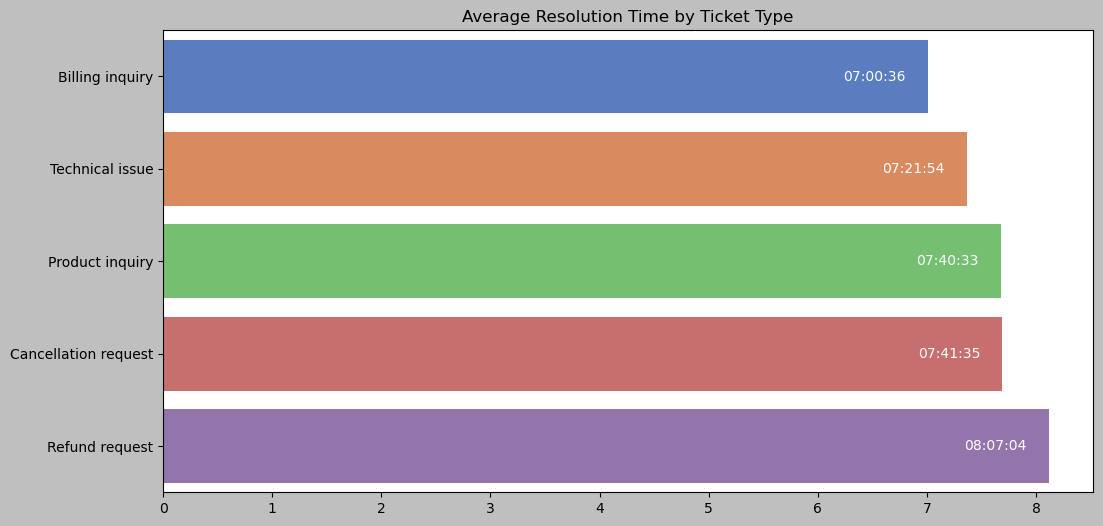

In [35]:
# What is the Average resolution time for different types of issues

Average_Resolution_Time = data.groupby('Ticket Type').agg({'Resolution Time': 'mean'})
Average_Resolution_Time['Resolution Time Formatted'] = Average_Resolution_Time['Resolution Time'].apply(
    lambda x: f"{int(x.total_seconds() // 3600):02}:{int((x.total_seconds() % 3600) // 60):02}:{int(x.total_seconds() % 60):02}" if pd.notnull(x) else None
)
Average_Resolution_Time.drop('Resolution Time', axis=1, inplace=True)
Average_Resolution_Time = Average_Resolution_Time.sort_values(by='Resolution Time Formatted', ascending=True)
# Reset index to make 'Ticket Type' a column
Average_Resolution_Time = Average_Resolution_Time.reset_index()

# Convert 'Resolution Time Formatted' to numerical time in hours for plotting
def convert_to_hours(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h + m / 60 + s / 3600

Average_Resolution_Time['Resolution Time (hours)'] = Average_Resolution_Time['Resolution Time Formatted'].apply(convert_to_hours)

plt.style.use('grayscale')
plt.figure(figsize=(12, 6))  # Adjusted width to 12 for more space
sns.barplot(
    x='Resolution Time (hours)',
    y='Ticket Type',
    data=Average_Resolution_Time,
       palette="muted"
)
plt.title('Average Resolution Time by Ticket Type')
plt.xlabel('')
plt.ylabel('')

for index, row in Average_Resolution_Time.iterrows():
    plt.text(row['Resolution Time (hours)'] - 0.2, index, row['Resolution Time Formatted'], color='white', va="center", ha="right")

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\379889146.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


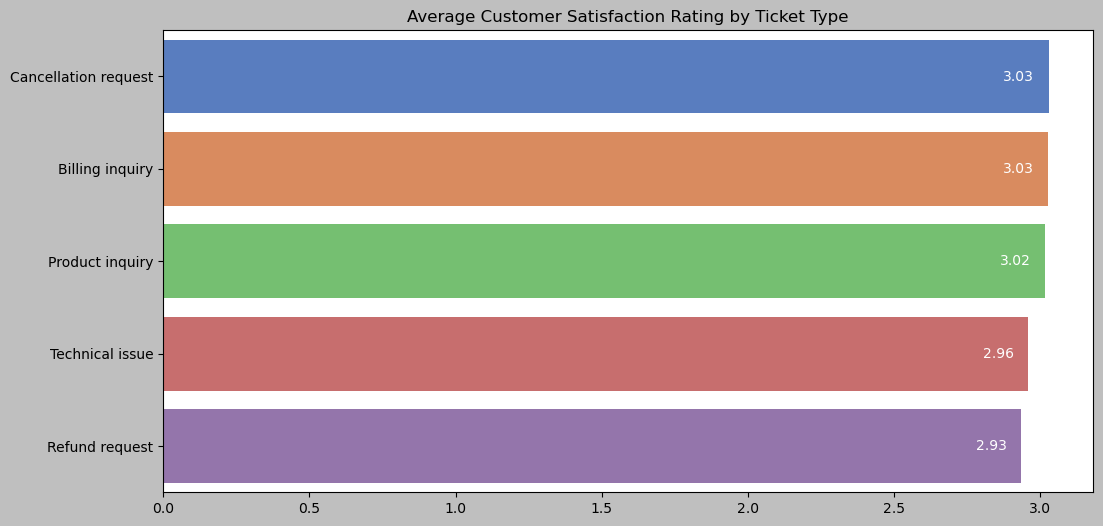

In [36]:
# What is the most type of issue lead to customer dissatisfaction
result = data.groupby('Ticket Type').agg({'Customer Satisfaction Rating':'mean'})

result_sorted = result.sort_values(by='Customer Satisfaction Rating', ascending=False)

result_sorted = result_sorted.reset_index()

plt.style.use('grayscale')
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Customer Satisfaction Rating',
    y='Ticket Type',
    data=result_sorted,
    palette="muted"
)
plt.title('Average Customer Satisfaction Rating by Ticket Type')
plt.xlabel('')
plt.ylabel('')

for index, row in result_sorted.iterrows():
    plt.text(row['Customer Satisfaction Rating'] - 0.05, index, f"{row['Customer Satisfaction Rating']:.2f}",
             color='white', va="center", ha="right")

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\3033491270.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=refund_subjects_sorted['Customer Satisfaction Rating'], y=refund_subjects_sorted.index, palette='viridis')


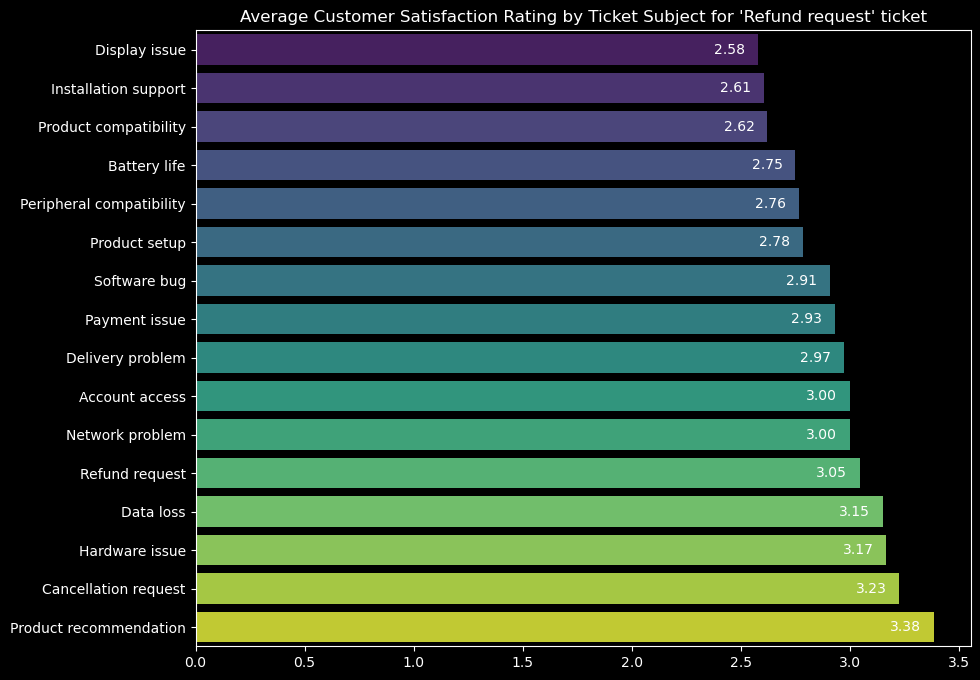

In [37]:
# Filter data to only include 'refund request' ticket type
refund_requests = data[data['Ticket Type'] == 'Refund request']
refund_subjects = refund_requests.groupby('Ticket Subject').agg({'Customer Satisfaction Rating': 'mean'})
refund_subjects_sorted = refund_subjects.sort_values(by='Customer Satisfaction Rating', ascending=True)

plt.style.use('dark_background')
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=refund_subjects_sorted['Customer Satisfaction Rating'], y=refund_subjects_sorted.index, palette='viridis')

for p in ax.patches:
    ax.text(p.get_width() -0.2 , p.get_y() + p.get_height() / 2,
            f'{p.get_width():.2f}', fontsize=10, color='white', ha='left', va='center')
    plt.title("Average Customer Satisfaction Rating by Ticket Subject for 'Refund request' ticket", color='white')
plt.xlabel('', color='white')
plt.ylabel('', color='white')

plt.show()

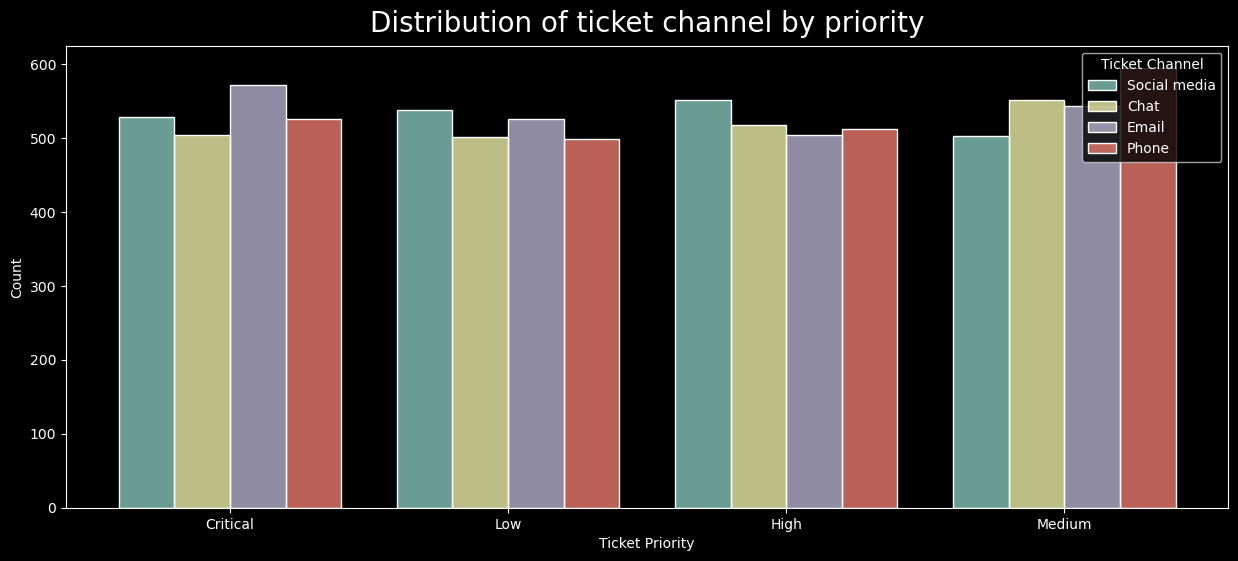

In [38]:
#a. Ticket channel and ticket priority

plt.figure(figsize = (15,6))
sns.histplot(data, hue = 'Ticket Channel', x = 'Ticket Priority',multiple = 'dodge', shrink = 0.8)
plt.title('Distribution of ticket channel by priority', loc = 'center', pad = 10, size = 20)
plt.show()


In [39]:
#handling null values
data['Resolution'] = data['Resolution'].fillna('None')
data['First Response Time'] = data['First Response Time'].fillna('No response')
data['Time to Resolution'] = data['Time to Resolution'].fillna('No resolution')
data['Customer Satisfaction Rating'] = data['Customer Satisfaction Rating'].fillna('No rating')

In [40]:
age = []
for i in data['Customer Age']:
    if i<=30:
        age.append('Young Customer')
    elif 30<i<55:
        age.append('Middle Age Customer')
    else:
        age.append('Old Customer')
data['Type of Customer'] = age

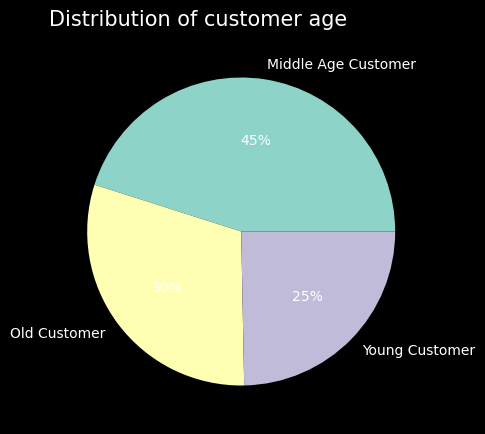

In [41]:
chart_age = data['Type of Customer'].value_counts()
chart_gen = data['Customer Gender'].value_counts()
plt.figure(figsize = (10,5))
plt.pie(chart_age, labels = chart_age.index, autopct='%.0f%%')
plt.title('Distribution of customer age', loc = 'left', pad = 10, size =
15)
plt.show()

In [42]:
A = []
for x in data['First Response Time']:
    if x == 'No response':
        A.append('No')
    else:
        A.append('Yes')
data['Response'] = A

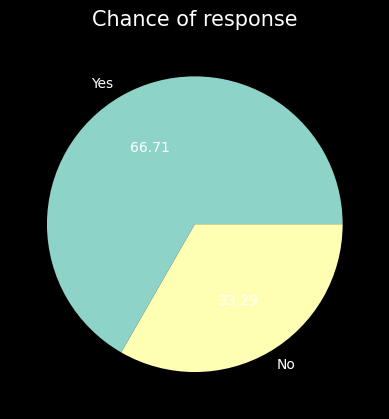

In [43]:
chance_of_response = data['Response'].value_counts()
plt.pie(chance_of_response, labels = chance_of_response.index, autopct = '%.2f')
plt.title('Chance of response', loc = 'center', pad = 10, size = 15)
plt.show()

In [44]:
B = []
for y in data['Time to Resolution']:
    if y == 'No resolution':
        B.append('No')
    else:
        B.append('Yes')
data['Resolution_bin'] = B

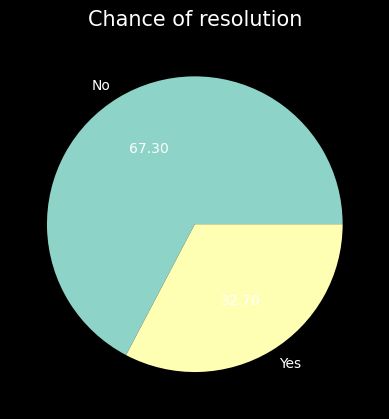

In [45]:
chance_of_resolution = data['Resolution_bin'].value_counts()
plt.pie(chance_of_resolution, labels = chance_of_resolution.index, autopct = '%.2f')
plt.title('Chance of resolution', loc = 'center', pad = 10, size = 15)
plt.show()

In [46]:
#Create a pivot table for caculating
priority = pd.pivot_table(data, index = ['Ticket Priority'], values = ['Customer Name'], columns = ['Resolution_bin'], aggfunc = len).reset_index()
priority = priority.rename(columns = {'Customer Name': 'Chance of Solution'})
priority['Percent'] = (priority['Chance of Solution']['Yes']/priority['Chance of Solution']['No'])*100
priority

Ticket Priority Chance of Solution         Percent
Resolution_bin                                 No  Yes           
0                     Critical               1403  726  51.746258
1                         High               1380  705  51.086957
2                          Low               1419  644  45.384073
3                       Medium               1498  694  46.328438

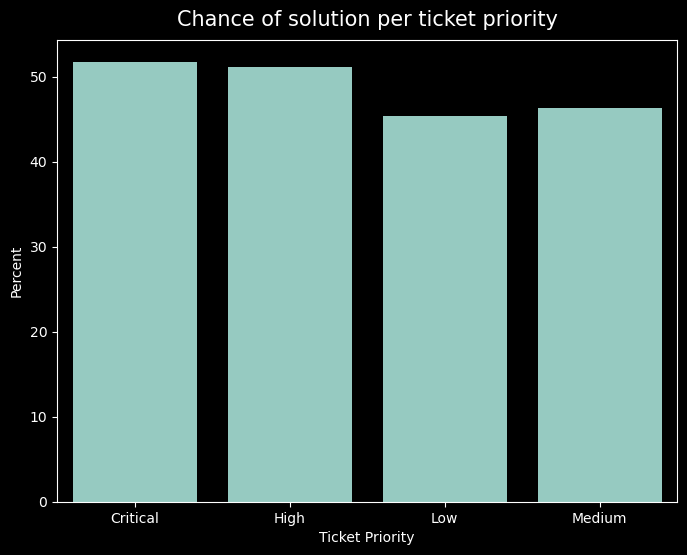

In [47]:
plt.figure(figsize = (8,6))
sns.barplot(priority, x = 'Ticket Priority', y = 'Percent')
plt.title('Chance of solution per ticket priority', loc = 'center', pad = 10, size = 15)
plt.show()

In [48]:
rating = pd.pivot_table(data, index = ['Customer Satisfaction Rating'], values= ['Customer Name'], columns = ['Resolution_bin'], aggfunc = len).reset_index()
rating = rating.rename(columns = {'Customer Name': 'Resolution'})
rating

Customer Satisfaction Rating Resolution       
Resolution_bin                                      No    Yes
0                                       1.0        NaN  553.0
1                                       2.0        NaN  549.0
2                                       3.0        NaN  580.0
3                                       4.0        NaN  543.0
4                                       5.0        NaN  544.0
5                                 No rating     5700.0    NaN

In [49]:
#Create new dataframe
df= data[data['Resolution_bin'] =='Yes']
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,...,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Age Group,YearMonth,Resolution Time,Type of Customer,Response,Resolution_bin
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,41-50,2020-07,0 days 06:51:00,Middle Age Customer,Yes,Yes
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,21-30,2020-11,NaT,Young Customer,Yes,Yes
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,61-70,2020-02,0 days 19:41:00,Old Customer,Yes,Yes
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,...,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,41-50,2021-01,NaT,Middle Age Customer,Yes,Yes
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,...,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,51-60,2021-10,NaT,Middle Age Customer,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,8453,Craig Forbes,jessica60@example.org,62,Female,MacBook Pro,2020-03-29,Refund request,Display issue,I'm having an issue with the {product_purchase...,...,Phone,2023-06-01 14:14:05,2023-06-01 05:47:05,3.0,61-70,2020-03,NaT,Old Customer,Yes,Yes
8453,8454,Paula Vazquez,wanderson@example.com,61,Other,iPhone,2020-06-20,Billing inquiry,Peripheral compatibility,The {product_purchased} is unable to establish...,...,Chat,2023-06-01 12:56:06,2023-06-01 04:45:06,5.0,61-70,2020-06,NaT,Old Customer,Yes,Yes
8455,8456,Ariel Lee,thompsonsamuel@example.org,54,Other,Dyson Vacuum Cleaner,2021-02-02,Billing inquiry,Refund request,"I've recently set up my {product_purchased}, b...",...,Email,2023-06-01 14:15:07,2023-06-01 06:58:07,1.0,51-60,2021-02,NaT,Middle Age Customer,Yes,Yes
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,...,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0,51-60,2021-08,NaT,Old Customer,Yes,Yes


In [50]:
rating = []
for i in df['Customer Satisfaction Rating']:
    if i<=2:
        rating.append('Low')
    elif i==3:
        rating.append('Medium')
    else:
        rating.append('High')
df['Type of rating'] = rating

C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\733784968.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type of rating'] = rating


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score, classification_report
from sklearn.metrics import confusion_matrix

ENCODED CATEGORICAL VALUES :

In [52]:
label = df[['Customer Gender','Age Group','Ticket Type', 'Ticket Subject','Ticket Priority', 'Ticket Channel','Type of Customer', 'Type of rating']]
encoder = LabelEncoder()
for col in label:
    value = np.unique(df[col])
    df[col] = encoder.fit_transform(df[col])
    encode_value = encoder.fit_transform(value)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\4128616308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\4128616308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3632\4128616308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [53]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,...,First Response Time,Time to Resolution,Customer Satisfaction Rating,Age Group,YearMonth,Resolution Time,Type of Customer,Response,Resolution_bin,Type of rating
2,3,Christopher Robbins,gonzalestracy@example.com,48,2,Dell XPS,2020-07-14,4,8,I'm facing a problem with my {product_purchase...,...,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,3,2020-07,0 days 06:51:00,0,Yes,Yes,2
3,4,Christina Dillon,bradleyolson@example.org,27,0,Microsoft Office,2020-11-13,0,0,I'm having an issue with the {product_purchase...,...,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,1,2020-11,NaT,2,Yes,Yes,2
4,5,Alexander Carroll,bradleymark@example.com,67,0,Autodesk AutoCAD,2020-02-04,0,3,I'm having an issue with the {product_purchase...,...,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,5,2020-02,0 days 19:41:00,1,Yes,Yes,1
10,11,Joseph Moreno,mbrown@example.org,48,1,Nintendo Switch,2021-01-19,1,3,I'm having an issue with the {product_purchase...,...,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,3,2021-01,NaT,0,Yes,Yes,1
11,12,Brandon Arnold,davisjohn@example.net,51,1,Microsoft Xbox Controller,2021-10-24,2,15,I'm having an issue with the {product_purchase...,...,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,4,2021-10,NaT,0,Yes,Yes,1


In [54]:
df=df.dropna()

FEATURE ENGINEERING :

In [55]:
y = df['Type of rating']
X = df.drop(columns = ['Ticket ID','Customer Name', 'Customer Email','Customer Age', 'Product Purchased', 'Date of Purchase','YearMonth',
                                 'Ticket Description', 'Ticket Status', 'First Response Time', 'Time to Resolution', 'Response',
                                 'Resolution_bin' ,'Resolution','Resolution Time'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [56]:
print(X_train.head())

      Customer Gender  Ticket Type  Ticket Subject  Ticket Priority  \
1699                0            4              13                2   
2807                2            4               6                0   
302                 1            2              10                3   
866                 1            3               6                0   
1852                0            4               1                2   

      Ticket Channel Customer Satisfaction Rating  Age Group  \
1699               1                          2.0          4   
2807               1                          5.0          4   
302                2                          1.0          3   
866                0                          3.0          2   
1852               2                          2.0          5   

      Type of Customer  Type of rating  
1699                 0               1  
2807                 1               0  
302                  0               1  
866                  0  

In [57]:
from sklearn import preprocessing
X_train_scaled=preprocessing.scale(X_train)
print(X_train_scaled)

[[-1.17609591  1.32528281  1.15172287 ...  0.68276812 -0.97126938
   0.25732103]
 [ 1.29722939  1.32528281 -0.38384251 ...  0.68276812  0.25980908
  -1.05618586]
 [ 0.06056674 -0.06955561  0.49362342 ...  0.03844157 -0.97126938
   0.25732103]
 ...
 [ 1.29722939  0.6278636   0.71298991 ...  0.68276812 -0.97126938
  -1.05618586]
 [-1.17609591 -0.76697482 -1.26130844 ... -1.25021154  1.49088754
   1.57082792]
 [ 0.06056674  0.6278636   0.49362342 ...  1.32709467  0.25980908
  -1.05618586]]


MODEL TRAINING AND EVALUATION :

In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
model.fit(X_train, y_train)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [59]:
X_test_scaled=preprocessing.scale(X_test)
test_pred=model.predict(X_test_scaled)
print(test_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [60]:
from sklearn import metrics
test_rmse=metrics.mean_squared_error(test_pred,y_test)**0.5
print(test_rmse)

0.7755149821534616


In [61]:
df_test=pd.DataFrame({'Actual':y_test,'Predicted':test_pred})
df_test1=df_test.head(25)
df_test1

,Actual,Predicted
6328,1,1
2883,1,1
3795,1,1
3830,0,1
5713,0,1
1993,1,1
6932,2,1
587,1,1
383,2,1
4382,1,1


In [62]:
from sklearn.metrics import r2_score
r2=model.score(X_train_scaled,y_train)
adj_r2=1-(1-r2)*(len(X_train_scaled)-1)/(len(X_train_scaled)-(X_train_scaled.shape[1]-1)-1)
print(r2,adj_r2)

0.38201246660730187 0.37757449509281227


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [63]:
#Scale numerical features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [64]:
y_pred = model.predict(X_test)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [65]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.40      0.57       281
           2       0.00      0.00      0.00         0

    accuracy                           0.40       281
   macro avg       0.33      0.13      0.19       281
weighted avg       1.00      0.40      0.57       281



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [67]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification report:\n",classification_report(y_pred, y_test))

Accuracy: 0.398576512455516
Confusion Matrix:
 [[  0 116   0]
 [  0 112   0]
 [  0  53   0]]

 Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.40      0.57       281
           2       0.00      0.00      0.00         0

    accuracy                           0.40       281
   macro avg       0.33      0.13      0.19       281
weighted avg       1.00      0.40      0.57       281



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

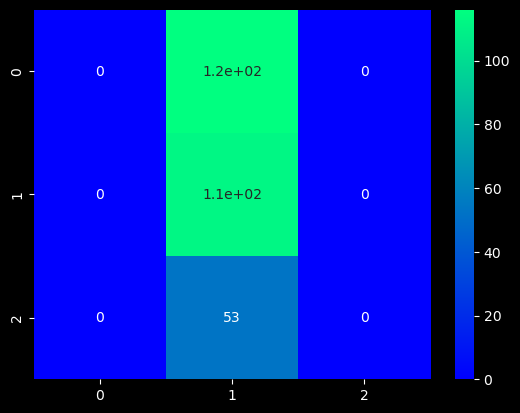

In [68]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, cmap = 'winter', annot = True)
